<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do Baseline

## Bibliotecas Utilizadas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Extração de Dados

In [2]:
!wget -q -O ccd_2019.zip https://www.dropbox.com/s/7rriacb7c6vzf3m/ccd_2019.zip

!unzip ccd_2019.zip

Archive:  ccd_2019.zip
replace bdmep_meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
!wget "https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115485&authkey=AJlb41BWz0YiBd8" -O 2019.zip
!unzip 2019.zip

--2019-10-27 16:47:57--  https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115485&authkey=AJlb41BWz0YiBd8
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://c9quda.bn.files.1drv.com/y4mL3zt7svbsV0QxPRxVRbgbpfdnl3ffLK4S_idYfCfLC3N9Xck5CyjBn8fezRyqgoaYIoyAhvQSAagsoP37nOTtBL1OzgqtgnaZxvhLhPNTpTvsk5AkYDdyyCEQ3CmNyLFPxN5LlLM2oYv71IWqGLyNQ4kBZDhx0laCYoWVxotJJQa7ACJbn9AuEOoX6-cMtAqC58De68ysrKiDIKlskcpSQ/2019.zip?download&psid=1 [following]
--2019-10-27 16:47:57--  https://c9quda.bn.files.1drv.com/y4mL3zt7svbsV0QxPRxVRbgbpfdnl3ffLK4S_idYfCfLC3N9Xck5CyjBn8fezRyqgoaYIoyAhvQSAagsoP37nOTtBL1OzgqtgnaZxvhLhPNTpTvsk5AkYDdyyCEQ3CmNyLFPxN5LlLM2oYv71IWqGLyNQ4kBZDhx0laCYoWVxotJJQa7ACJbn9AuEOoX6-cMtAqC58De68ysrKiDIKlskcpSQ/2019.zip?download&psid=1
Resolving c9quda.bn.files.1drv.com (c9quda.bn.files.1drv.com)... 1

In [0]:
directory = '2019'
files = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        files.append(filename)
        continue
    else:
        continue

In [5]:
df_2019 = pd.DataFrame()
for file in files:
    df_aux = pd.read_csv(directory+'/'+file, delimiter=',')
    df_2019 = pd.concat([df_aux, df_2019], sort=True)
id_2019 = pd.unique(df_2019['id'])
id_2019

array([83632, 82588, 82992, 82983, 82676, 82191, 82659, 83557, 83377,
       83049, 83288, 82331, 83927, 83623, 83698, 82098, 82198, 83811,
       83184, 83368, 82024, 82042, 82970, 82336, 83536, 83936, 83442,
       82765, 83738, 82975, 82178, 83286, 82382, 82141, 82689, 83807,
       82493, 82586, 83550, 82723, 83844, 82890, 83639, 83997, 82317,
       83592, 82326, 83190, 83912, 83249, 82188, 82184, 83338, 83376,
       82882, 82893, 82487, 83805, 83064, 82564, 82795, 83916, 82106,
       82590, 82990, 83192, 83096, 82476, 83736, 83781, 82392, 83386,
       83591, 82578, 83522, 83767, 82181, 82533, 83090, 82145, 82212,
       83967, 82780, 83013, 82361, 83334, 83221, 83244, 82792, 83676,
       82753, 83942, 82915, 82994, 82445, 83687, 83361, 82996, 83538,
       82863, 83744, 82798, 82246, 83964, 83229, 83428, 83577, 83526,
       83441, 82376, 83695, 83483, 83919, 83669, 83379, 83579, 82596,
       82693, 83007, 83714, 82610, 82598, 83683, 83851, 82976, 83470,
       82861, 82460,

<br><b>variável | descrição | unidade </b></br>
<br>date | data e hora da coleta             -
<br> id | ID da estação de coleta             -
<br>prec | precipitação |       mm
<br>tair | temperatura do ar  | graus Celsius
<br>tw | temperatura de bulbo úmido |  graus Celsius
<br>tmax | temperatura máxima do ar  | graus Celsius
<br>tmin | temperatura mínima do ar  | graus Celsius
<br>urmax | umidade relativa máxima  |             %
<br>patm | pressão atmosférica         |    hPa
<br>pnmm | pressão atmosférica média ao nível do mar  |           hPa
<br>wd | direção do vento        |   graus
<br>wsmax  |  rajadas de vento    |         m/s
<br>n |  horas de sol          |     h
<br>cc |   cobertura de nuvens    |           -
<br>evap  |   evaporação        |      mm
<br>ur  |   umidade relativa          |     %
<br>ws   |   velocidade do vento       |      m/s

In [6]:
df = pd.read_csv("inmetr.csv")
df.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,1970-05-04 00:00:00,83010,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,1970-05-04 12:00:00,83010,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
2,1970-05-04 18:00:00,83010,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,1970-05-05 00:00:00,83010,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.0,2.4,88.25,NaN
4,1970-05-05 12:00:00,83010,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [7]:
df_m = pd.read_csv("bdmep_meta.csv")
df_m.head()

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
1,82704,-72.666667,-7.633333,170.00,Cruzeiro do Sul,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
3,82807,-70.766667,-8.166667,190.00,Tarauacá,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
4,83098,-36.166667,-10.150000,56.13,Coruripe,Alagoas,AL,America/Maceio,-3,America/Maceio,-3


## Processamento de Dados Históricos

Os dados apresentados abragem o período entre os anos de 1970 e 2018.

Filtrando apenas para o Mês de Agosto:

In [8]:
mask = (df['date'].str.split('-',n=2,expand = True)[1]=='08')
df = df.loc[mask]
df.size

20944306

Filtrando apenas as Estações ainda Existentes em 2019:

In [9]:
mask = (df['id'].isin(id_2019))
df = df.loc[mask]
df.size

13499360

Extraindo o Ano da Coluna Date:

In [10]:
df['date'] = df['date'].str.split('-',n=1,expand = True)[1]
df.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
53402,08-01 00:00:00,82915,NaN,25.0,22.8,35.0,NaN,84.0,1010.6,NaN,NaN,NaN,5.6,4.0,3.2,74.75,0.0
53403,08-01 12:00:00,82915,0.0,22.2,21.6,NaN,19.7,94.0,1000.6,NaN,0.0,0.0,NaN,7.0,NaN,NaN,NaN
53404,08-01 18:00:00,82915,NaN,33.8,27.0,NaN,NaN,57.0,999.2,NaN,0.0,0.0,NaN,7.0,NaN,NaN,NaN
53405,08-02 00:00:00,82915,NaN,26.8,24.8,33.8,NaN,74.0,996.6,NaN,NaN,NaN,3.5,6.0,2.1,83.50,NaN
53406,08-02 12:00:00,82915,21.9,11.8,11.0,NaN,11.2,90.0,1009.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN


Extraindo a Hora de Medição da Coluna Date:

In [0]:
df['date'] = df['date'].str.split(' ',n=1,expand = True)[0]
df.head()
df_pre_gp = df #Extraindo para utilização no Cálculo do PCA

Group By por Data e Estação:

In [12]:
df = df.groupby(by=['date','id']).mean()
df.head(1000)

prec       tair         tw  ...      evap         ur        ws
date  id                                     ...                               
08-01 82024  6.219512  27.235246  24.882883  ...  2.597143  84.051471  1.025690
      82042  4.133333  26.858163  24.436145  ...  2.345455  83.840000  0.467799
      82098  3.716327  28.204027  25.416779  ...  2.765306  81.761364  1.290667
      82106  4.888889  25.806329  24.044521  ...  1.298000  88.738372  1.182592
      82113  6.386538  26.638000  24.857746  ...  1.847368  87.191860  1.266859
...               ...        ...        ...  ...       ...        ...       ...
08-06 82336  3.765116  28.311024  25.521930  ...  3.527778  80.323529  1.007813
      82353  1.214815  28.338961  24.939610  ...  2.410870  77.088889  1.326016
      82361  1.113953  28.308462  25.276378  ...  3.400000  78.694444  1.404924
      82376  0.081395  28.585217  24.247826  ...  4.674419  72.789474  2.037037
      82382  0.159524  28.420909  23.314545  ...  5.735714  68.409722  2.142157

[1000 rows x 15 columns]

## Processamento de Dados Atuais

In [13]:
df_2019.head()

,cc,date,evap,id,n,patm,pnmm,prec,request_status,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
0,-9999.0,2019-01-01T00:00:00Z,3.0,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
1,-9999.0,2019-01-01T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,6.2,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
2,-9999.0,2019-01-02T00:00:00Z,2.0,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
3,-9999.0,2019-01-02T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,0.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
4,-9999.0,2019-01-03T00:00:00Z,3.5,83632,-9999.0,-9999.0,-9999.0,-9999.0,Success: (200) OK,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0


In [14]:
df_2019 = df_2019.drop(['request_status'],axis=1)
df_2019.head()

,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
0,-9999.0,2019-01-01T00:00:00Z,3.0,83632,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
1,-9999.0,2019-01-01T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,6.2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
2,-9999.0,2019-01-02T00:00:00Z,2.0,83632,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
3,-9999.0,2019-01-02T12:00:00Z,-9999.0,83632,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0
4,-9999.0,2019-01-03T00:00:00Z,3.5,83632,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0


Substituindo Valores Inválidos (-9999.0):

In [15]:
df_2019 = df_2019.replace(-9999.0,np.nan)
df_2019.head()

,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
0,NaN,2019-01-01T00:00:00Z,3.0,83632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2019-01-01T12:00:00Z,NaN,83632,NaN,NaN,NaN,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2019-01-02T00:00:00Z,2.0,83632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2019-01-02T12:00:00Z,NaN,83632,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2019-01-03T00:00:00Z,3.5,83632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Segue-se agora o mesmo Processo feito para os Dados Históricos.

Filtrando apenas para o Mês de Agosto:

In [16]:
mask = (df_2019['date'].str.split('-',n=2,expand = True)[1]=='08')
df_2019 = df_2019.loc[mask]
df_2019.size

250733

Os Dados aqui já contém naturalmente apenas Estações Existentes em 2019.

O Ano também já é naturalmente o de 2019, mas seu valor será extraído para fins de padronização.

In [17]:
df_2019['date'] = df_2019['date'].str.split('-',n=1,expand = True)[1]
df_2019.head()

,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
302,NaN,08-01T00:00:00Z,2.1,83632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,08-01T12:00:00Z,NaN,83632,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,08-02T00:00:00Z,1.8,83632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,08-02T12:00:00Z,NaN,83632,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,NaN,08-03T00:00:00Z,2.3,83632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extraindo a Hora de Medição da Coluna Date:

In [0]:
df_2019['date'] = df_2019['date'].str.split('T',n=1,expand = True)[0]
df_2019.head()
df_2019_pre_gp = df_2019 #Extraindo para utilização no Cálculo do PCA

Group By por Data e Estação:

In [19]:
df_2019 = df_2019.groupby(by=['date','id']).mean()
df_2019.head(1000)

cc  evap     n  ...         wd        ws     wsmax
date  id                            ...                               
08-01 82024   6.250000   NaN   9.6  ...  11.500000  0.514440  0.514440
      82098   6.333333   3.7   8.9  ...   7.666667  1.666667  2.000000
      82106   9.000000   NaN   NaN  ...   4.500000  0.514440  0.514440
      82141   5.000000   0.3  10.5  ...  14.333333  2.733333  2.733333
      82145   4.333333   1.0   9.8  ...  15.000000  0.533333  0.533333
...                ...   ...   ...  ...        ...       ...       ...
08-06 83565   9.666667   2.2   2.5  ...  11.000000  1.333333  2.000000
      83579   6.333333   4.2   0.5  ...        NaN       NaN       NaN
      83587   9.000000   4.7   1.3  ...   7.666667  2.600000  2.700000
      83589  10.000000   3.9   NaN  ...        NaN       NaN       NaN
      83592   8.333333   3.4   0.1  ...  14.000000  1.666667  1.333333

[1000 rows x 15 columns]

## Cálculo da Diferença com Relação ao Baseline

In [20]:
df.head()

prec       tair         tw  ...      evap         ur        ws
date  id                                     ...                               
08-01 82024  6.219512  27.235246  24.882883  ...  2.597143  84.051471  1.025690
      82042  4.133333  26.858163  24.436145  ...  2.345455  83.840000  0.467799
      82098  3.716327  28.204027  25.416779  ...  2.765306  81.761364  1.290667
      82106  4.888889  25.806329  24.044521  ...  1.298000  88.738372  1.182592
      82113  6.386538  26.638000  24.857746  ...  1.847368  87.191860  1.266859

[5 rows x 15 columns]

In [21]:
df_2019.head()

cc  evap     n  ...         wd        ws     wsmax
date  id                           ...                               
08-01 82024  6.250000   NaN   9.6  ...  11.500000  0.514440  0.514440
      82098  6.333333   3.7   8.9  ...   7.666667  1.666667  2.000000
      82106  9.000000   NaN   NaN  ...   4.500000  0.514440  0.514440
      82141  5.000000   0.3  10.5  ...  14.333333  2.733333  2.733333
      82145  4.333333   1.0   9.8  ...  15.000000  0.533333  0.533333

[5 rows x 15 columns]

In [22]:
df_merged = pd.merge(df_2019,df,on=['date','id'])
df_merged.head()

cc_x  evap_x   n_x  ...    evap_y       ur_y      ws_y
date  id                             ...                               
08-01 82024  6.250000     NaN   9.6  ...  2.597143  84.051471  1.025690
      82098  6.333333     3.7   8.9  ...  2.765306  81.761364  1.290667
      82106  9.000000     NaN   NaN  ...  1.298000  88.738372  1.182592
      82141  5.000000     0.3  10.5  ...  2.694444  79.305000  2.241212
      82145  4.333333     1.0   9.8  ...  2.139535  85.653846  1.192929

[5 rows x 30 columns]

In [0]:
diff = pd.DataFrame()
measures = ['tair','tmax','tmin','tw']
for column in measures:
  diff[column] =  abs(df_merged[column+'_x'] - df_merged[column+'_y'])

In [24]:
diff.head(1000)

tair      tmax      tmin        tw
date  id                                           
08-01 82024  3.135246  2.330769  1.400000  1.482883
      82098  1.862640  1.224000  2.968000  0.983221
      82106  0.256329  0.103704  0.892453  1.455479
      82141  1.204618  0.666038  3.034615  0.761078
      82145  0.789368  1.067500  1.788372  0.633046
...               ...       ...       ...       ...
08-06 83565  4.729023  7.289189       NaN  0.195942
      83579  3.758156       NaN  0.853191  1.361594
      83587  2.410766  4.507407  0.800000  0.806329
      83589  0.210173  3.923077  4.930769  1.080313
      83592  0.192402  2.373913  2.275556  0.013784

[1000 rows x 4 columns]

In [0]:
#diff.to_csv('./diff_temp.csv')

In [0]:
from google.colab import files
#files.download('diff_temp.csv')

## Aplicação de PCA

In [103]:
df_pre_gp.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
53402,08-01,82915,NaN,25.0,22.8,35.0,NaN,84.0,1010.6,NaN,NaN,NaN,5.6,4.0,3.2,74.75,0.0
53403,08-01,82915,0.0,22.2,21.6,NaN,19.7,94.0,1000.6,NaN,0.0,0.0,NaN,7.0,NaN,NaN,NaN
53404,08-01,82915,NaN,33.8,27.0,NaN,NaN,57.0,999.2,NaN,0.0,0.0,NaN,7.0,NaN,NaN,NaN
53405,08-02,82915,NaN,26.8,24.8,33.8,NaN,74.0,996.6,NaN,NaN,NaN,3.5,6.0,2.1,83.50,NaN
53406,08-02,82915,21.9,11.8,11.0,NaN,11.2,90.0,1009.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN


In [104]:
df_2019_pre_gp.head()

,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
302,NaN,08-01,2.1,83632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,08-01,NaN,83632,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,08-02,1.8,83632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,08-02,NaN,83632,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,NaN,08-03,2.3,83632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cocatenando os dois Dataframes:

In [105]:
X = pd.concat([df_pre_gp,df_2019_pre_gp])
X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
53402,4.00,08-01,3.2,82915,5.6,1010.6,NaN,NaN,25.0,35.0,NaN,22.8,74.75,84.0,NaN,0.0,NaN
53403,7.00,08-01,NaN,82915,NaN,1000.6,NaN,0.0,22.2,NaN,19.7,21.6,NaN,94.0,0.0,NaN,0.0
53404,7.00,08-01,NaN,82915,NaN,999.2,NaN,NaN,33.8,NaN,NaN,27.0,NaN,57.0,0.0,NaN,0.0
53405,6.00,08-02,2.1,82915,3.5,996.6,NaN,NaN,26.8,33.8,NaN,24.8,83.50,74.0,NaN,NaN,NaN
53406,8.00,08-02,NaN,82915,NaN,1009.0,NaN,21.9,11.8,NaN,11.2,11.0,NaN,90.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2.50,08-02,NaN,82562,NaN,1003.6,1014.3,0.0,28.3,NaN,23.0,NaN,NaN,77.0,36.0,NaN,NaN
504,3.75,08-02,NaN,82562,NaN,1000.6,1011.3,NaN,35.5,NaN,NaN,NaN,NaN,47.0,14.0,NaN,NaN
505,0.00,08-03,NaN,82562,NaN,1002.9,1013.6,NaN,30.3,NaN,NaN,NaN,NaN,66.0,9.0,NaN,NaN
506,NaN,08-03,NaN,82562,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
X = X.groupby(by=['date','id']).mean()
X

cc      evap         n  ...         wd        ws     wsmax
date  id                                   ...                               
08-01 82024  5.298800  2.597143  5.309091  ...  10.201923  1.013518  1.066496
      82042  5.754639  2.345455  5.860000  ...   3.578947  0.467799  0.445155
      82098  4.719868  2.784000  8.251020  ...   5.738806  1.298039  1.398026
      82106  5.475309  1.298000  4.656250  ...   9.426357  1.170219  1.172522
      82113  3.563333  1.847368  6.700000  ...  13.333333  1.266859  1.276955
...               ...       ...       ...  ...        ...       ...       ...
08-31 83967  5.215839  2.359615  4.674074  ...  15.403727  2.106845  2.140708
      83980  4.631579  3.256000  4.938000  ...  15.546667  3.246771  3.115013
      83985  6.345455  2.354054  5.303571  ...  13.719626  3.071296  2.985981
      83995  4.583942  2.351111  4.742500  ...  15.284672  3.872464  3.355882
      83997  5.543478  2.247826  5.334091  ...  15.731884  4.398374  4.139344

[6045 rows x 15 columns]

Filtrando para dia 19:

In [107]:
X = X.loc['08-19']
X

,cc,evap,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
id,,,,,,,,,,,,,,,
82024,5.462602,3.236364,5.743333,1001.922857,1011.650000,7.351282,27.880992,32.912821,23.513514,25.115741,81.712121,80.226804,9.639175,1.158565,1.211875
82042,5.805392,2.450000,6.435000,NaN,NaN,4.370968,27.722549,32.533333,22.430303,25.010714,83.115385,82.670886,3.291139,0.670222,0.677841
82098,4.677419,3.148077,8.900000,1010.198639,1011.883333,2.232692,28.639103,32.275000,23.905882,25.633974,79.266304,78.536232,8.355072,1.967949,2.023718
82106,4.884431,1.460784,4.891837,993.564545,1009.966667,8.489474,26.081212,31.462500,21.389091,24.205405,87.139535,86.522727,11.613636,1.193914,1.194979
82113,3.887908,1.776316,5.665909,998.916667,NaN,4.084906,26.689542,32.266667,22.130769,24.909790,86.670455,86.216000,15.712000,1.223741,1.279382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83967,4.875000,1.915094,5.087273,1014.116463,1018.227778,2.505455,17.079878,21.738182,11.756364,14.266456,77.036364,75.018293,13.682927,1.788841,1.815779
83980,4.466667,3.479592,4.420408,991.535811,1017.598148,3.691837,14.524324,19.293750,9.333333,11.719595,72.898936,71.959459,14.864865,3.103401,2.926351
83985,6.428571,2.543243,4.425000,1017.783929,NaN,1.880556,14.941964,19.111429,9.568571,13.271429,85.317568,82.598214,13.747748,3.032432,2.900000


Decompondo Wd:

In [108]:
X['wd'] = X['wd'].multiply(np.pi/180)
X['wd_cos'] = X['wd'].apply(np.cos)
X['wd_sin'] = X['wd'].apply(np.sin)
X = X.drop('wd',axis=1)
X

,cc,evap,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,ws,wsmax,wd_cos,wd_sin
id,,,,,,,,,,,,,,,,
82024,5.462602,3.236364,5.743333,1001.922857,1011.650000,7.351282,27.880992,32.912821,23.513514,25.115741,81.712121,80.226804,1.158565,1.211875,0.985882,0.167443
82042,5.805392,2.450000,6.435000,NaN,NaN,4.370968,27.722549,32.533333,22.430303,25.010714,83.115385,82.670886,0.670222,0.677841,0.998351,0.057410
82098,4.677419,3.148077,8.900000,1010.198639,1011.883333,2.232692,28.639103,32.275000,23.905882,25.633974,79.266304,78.536232,1.967949,2.023718,0.989387,0.145307
82106,4.884431,1.460784,4.891837,993.564545,1009.966667,8.489474,26.081212,31.462500,21.389091,24.205405,87.139535,86.522727,1.193914,1.194979,0.979527,0.201311
82113,3.887908,1.776316,5.665909,998.916667,NaN,4.084906,26.689542,32.266667,22.130769,24.909790,86.670455,86.216000,1.223741,1.279382,0.962635,0.270802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83967,4.875000,1.915094,5.087273,1014.116463,1018.227778,2.505455,17.079878,21.738182,11.756364,14.266456,77.036364,75.018293,1.788841,1.815779,0.971620,0.236549
83980,4.466667,3.479592,4.420408,991.535811,1017.598148,3.691837,14.524324,19.293750,9.333333,11.719595,72.898936,71.959459,3.103401,2.926351,0.966534,0.256540
83985,6.428571,2.543243,4.425000,1017.783929,NaN,1.880556,14.941964,19.111429,9.568571,13.271429,85.317568,82.598214,3.032432,2.900000,0.971351,0.237648


Dropando NaN's:


In [109]:
X = X.dropna()
X

,cc,evap,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,ws,wsmax,wd_cos,wd_sin
id,,,,,,,,,,,,,,,,
82024,5.462602,3.236364,5.743333,1001.922857,1011.650000,7.351282,27.880992,32.912821,23.513514,25.115741,81.712121,80.226804,1.158565,1.211875,0.985882,0.167443
82098,4.677419,3.148077,8.900000,1010.198639,1011.883333,2.232692,28.639103,32.275000,23.905882,25.633974,79.266304,78.536232,1.967949,2.023718,0.989387,0.145307
82106,4.884431,1.460784,4.891837,993.564545,1009.966667,8.489474,26.081212,31.462500,21.389091,24.205405,87.139535,86.522727,1.193914,1.194979,0.979527,0.201311
82141,3.233333,2.994444,8.546296,1011.428000,1011.285417,2.443103,28.552976,31.315385,24.628302,25.534524,79.020000,77.751678,2.504242,2.607273,0.988185,0.153267
82145,4.627119,2.321951,8.109524,1008.248980,1012.557407,2.313953,27.269565,31.854054,20.870000,25.053913,85.901316,83.686957,1.151111,1.117582,0.994602,0.103765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83964,4.283688,2.297872,5.029787,968.835461,1018.205556,1.708511,14.759859,19.414894,9.957447,11.925352,74.367021,71.816901,1.748672,1.886883,0.958697,0.284431
83967,4.875000,1.915094,5.087273,1014.116463,1018.227778,2.505455,17.079878,21.738182,11.756364,14.266456,77.036364,75.018293,1.788841,1.815779,0.971620,0.236549
83980,4.466667,3.479592,4.420408,991.535811,1017.598148,3.691837,14.524324,19.293750,9.333333,11.719595,72.898936,71.959459,3.103401,2.926351,0.966534,0.256540


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [0]:
#pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])
sc = StandardScaler()
pca = PCA(n_components=3)

Guardando index de X:

In [0]:
index = X.index

Calculando PCA:

In [0]:
X = sc.fit_transform(X.values)
pca_values = pca.fit_transform(X)

In [114]:
pca_values = pd.DataFrame(pca_values)
pca_values

,0,1,2
0,0.041286,4.500024,-0.797471
1,-1.555133,3.488031,0.065955
2,1.169083,4.503105,-0.881481
3,-1.684043,3.227437,0.683155
4,-0.972034,3.923929,-1.535067
...,...,...,...
163,4.363965,-1.790542,-1.158680
164,3.640791,0.002124,-1.084213
165,4.465704,-1.457392,0.109036
166,4.963034,-0.145945,0.033667


Concatenando Latitude e Longitude:


In [115]:
pca_values.index = index
pca_values

,0,1,2
id,,,
82024,0.041286,4.500024,-0.797471
82098,-1.555133,3.488031,0.065955
82106,1.169083,4.503105,-0.881481
82141,-1.684043,3.227437,0.683155
82145,-0.972034,3.923929,-1.535067
...,...,...,...
83964,4.363965,-1.790542,-1.158680
83967,3.640791,0.002124,-1.084213
83980,4.465704,-1.457392,0.109036


In [116]:
pca_values = pca_values.merge(df_m,on='id')
pca_values = pca_values.drop(['alt','name','state','uf','time_zone','offset_utc','time_zone.1','offset_utc.1'],axis=1)
pca_values

,id,0,1,2,lon,lat
0,82024,0.041286,4.500024,-0.797471,-60.650000,2.816667
1,82098,-1.555133,3.488031,0.065955,-51.116667,-0.050000
2,82106,1.169083,4.503105,-0.881481,-67.000000,-0.116667
3,82141,-1.684043,3.227437,0.683155,-48.516667,-0.733333
4,82145,-0.972034,3.923929,-1.535067,-46.900000,-1.066667
...,...,...,...,...,...,...
163,83964,4.363965,-1.790542,-1.158680,-52.516667,-30.533333
164,83967,3.640791,0.002124,-1.084213,-51.166667,-30.050000
165,83980,4.465704,-1.457392,0.109036,-54.100000,-31.333333
166,83995,4.963034,-0.145945,0.033667,-52.100000,-32.033333


In [117]:
pca_components = pd.DataFrame(pca.components_)
pca_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.296371,-0.289575,-0.326861,-0.063397,0.285436,0.228554,-0.342711,-0.359671,-0.245568,-0.216456,0.266651,0.272378,0.049454,0.045730,-0.204857,0.194874
1,0.192971,-0.271494,-0.137052,0.374536,-0.137315,0.247936,0.192682,0.125177,0.325274,0.397580,0.349000,0.343735,-0.112808,-0.115173,0.182234,-0.183964
2,0.108187,0.134378,0.105924,0.183764,0.002245,0.047521,0.107012,0.012431,0.235960,0.127799,0.035213,0.031312,0.602798,0.603286,-0.211662,0.255009


In [118]:
pca.explained_variance_ratio_

array([0.42072303, 0.23674437, 0.14330238])

In [0]:
pca_values.to_csv('./pca_values_08-19.csv')
pca_components.to_csv('./pca_components_08-19.csv')

In [0]:
from google.colab import files
files.download('pca_values_08-19.csv')
files.download('pca_components_08-19.csv')

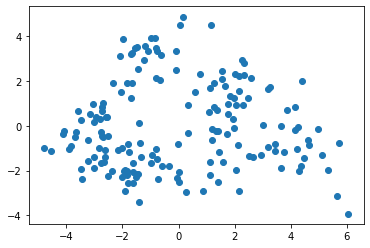

In [121]:
plt.scatter(pca_values[0],pca_values[1],)